In [3]:
# 성능 평가 함수 (라벨:0, 1, 2, 3)
def evaluate_model(y_true, y_pred, model_name):
    print(f"\n{model_name} 성능 평가")
    print("="* 50)

    # 정확도 출력
    accuracy = accuracy_score(y_true, y_pred)
    print(f"\n정확도: {accuracy:.4f}")

    # 분류 보고서 출력 (정밀도, 재현율, F1 점수 등)
    print("\n분류 보고서:")
    print(classification_report(y_true, y_pred))

    # 혼동 행렬 시각화
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix(y_true, y_pred),
                annot=True, fmt='d', cmap='Blues',
                xticklabels=['0', '1', '2', '3'],
                yticklabels=['0', '1', '2', '3'])
    plt.title(f'{model_name} Confusion Matrix')
    plt.ylabel('Actual')
    plt.xlabel('Predict')
    plt.show()

# 성능 평가 함수 (라벨: 0, 1)
def evaluate_model1(y_true, y_pred, model_name):
    print(f"\n{model_name} 성능 평가")
    print("="* 50)

    # 정확도 출력
    accuracy = accuracy_score(y_true, y_pred)
    print(f"\n정확도: {accuracy:.4f}")

    # 분류 보고서 출력 (정밀도, 재현율, F1 점수 등)
    print("\n분류 보고서:")
    print(classification_report(y_true, y_pred))

    # 혼동 행렬 시각화
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix(y_true, y_pred),
                annot=True, fmt='d', cmap='Blues',
                xticklabels=['0', '1'],
                yticklabels=['0', '1'])
    plt.title(f'{model_name} Confusion Matrix')
    plt.ylabel('Actual')
    plt.xlabel('Predict')
    plt.show()


# 특성 중요도 시각화 함수
def plot_feature_importance(model, model_name):
    importances = pd.DataFrame({
        'feature': X.columns,
        'importance': model.feature_importances_
    }).sort_values('importance', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='importance', y='feature', data=importances)
    plt.title(f'{model_name} Feature Importance')
    plt.show()

# 라이브러리, 데이터, 변수

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

data = pd.read_csv('C:\\Users\\edcrf\\OneDrive\\문서\\GitHub\\data-analyze\\EngineFaultDB_Final.csv')
print(data.head())

variable = data.columns

   Fault    MAP    TPS  Force  Power       RPM  Consumption L/H  \
0      0  3.549  1.889  7.428  5.227  1192.769            3.057   
1      0  3.559  1.899  7.646  5.327  1145.191            2.914   
2      0  3.539  1.899  7.578  5.100  1208.505            2.976   
3      0  3.519  1.889  7.371  5.255  1164.127            2.908   
4      0  3.549  1.879  7.405  5.177  1172.032            2.898   

   Consumption L/100KM   Speed     CO       HC     CO2     O2  Lambda     AFR  
0               11.720  24.901  0.460  196.089  14.356  1.080   1.047  15.385  
1               11.276  25.030  0.478  196.283  14.492  1.107   1.083  15.926  
2               11.926  24.213  0.464  200.367  14.443  1.099   1.072  15.754  
3               11.786  24.407  0.471  195.345  13.853  1.076   1.006  14.787  
4               12.169  24.875  0.468  194.979  13.752  1.060   0.984  14.470  


# 데이터 정보

In [5]:
data.describe().T

count         mean         std       min        25%  \
Fault                55999.0     1.482187    1.149430     0.000     0.0000   
MAP                  55999.0     1.832515    0.837786     0.453     1.2170   
TPS                  55999.0     1.395269    0.906950     0.382     0.9010   
Force                55999.0   286.691705  378.774917     2.580    76.8485   
Power                55999.0     5.657126    7.684147     0.465     0.9940   
RPM                  55999.0  2398.053774  932.008680  1066.452  1830.2005   
Consumption L/H      55999.0     4.497634    2.221497     1.917     2.9810   
Consumption L/100KM  55999.0     8.939794    3.154110     5.187     6.5730   
Speed                55999.0    51.688740   20.140345    22.757    39.4120   
CO                   55999.0     1.932430    1.988789     0.421     0.6410   
HC                   55999.0   188.446083  111.047015     1.787   158.8030   
CO2                  55999.0    13.035230    1.046567     8.649    12.8420   
O2                   55999.0     0.585910    0.223713     0.203     0.4150   
Lambda               55999.0     0.963907    0.065973     0.695     0.9370   
AFR                  55999.0    14.169408    0.969802    10.210    13.7800   

                          50%        75%       max  
Fault                   2.000     3.0000     3.000  
MAP                     1.543     1.9400     4.547  
TPS                     1.013     1.2580     4.048  
Force                  92.500   257.9895  1537.118  
Power                   2.398     4.6960    33.946  
RPM                  2105.588  2761.3735  5013.402  
Consumption L/H         3.824     5.1445    14.810  
Consumption L/100KM     8.068     9.9240    20.043  
Speed                  45.393    59.5080   107.539  
CO                      1.129     2.4550    10.132  
HC                    178.265   203.6780   975.657  
CO2                    13.242    13.6390    15.129  
O2                      0.533     0.7890     1.151  
Lambda                  0.977     1.0080     1.149  
AFR                    14.365    14.8230    16.893

In [6]:
data.isnull().sum()

Fault                  0
MAP                    0
TPS                    0
Force                  0
Power                  0
RPM                    0
Consumption L/H        0
Consumption L/100KM    0
Speed                  0
CO                     0
HC                     0
CO2                    0
O2                     0
Lambda                 0
AFR                    0
dtype: int64

In [7]:
data.duplicated().sum()

1

# 결함 유형 1, 2, 3을 1로 만들고 정상 0과 각 변수 분포 확인

In [8]:
def classification(r):
    if r['Fault'] == 0:
        r['Flag'] = 0
    else:
        r['Flag'] = 1
    return r

new_data = data.apply(classification, axis=1)
data2 = new_data.drop('Fault', axis=1)
column = data2.columns

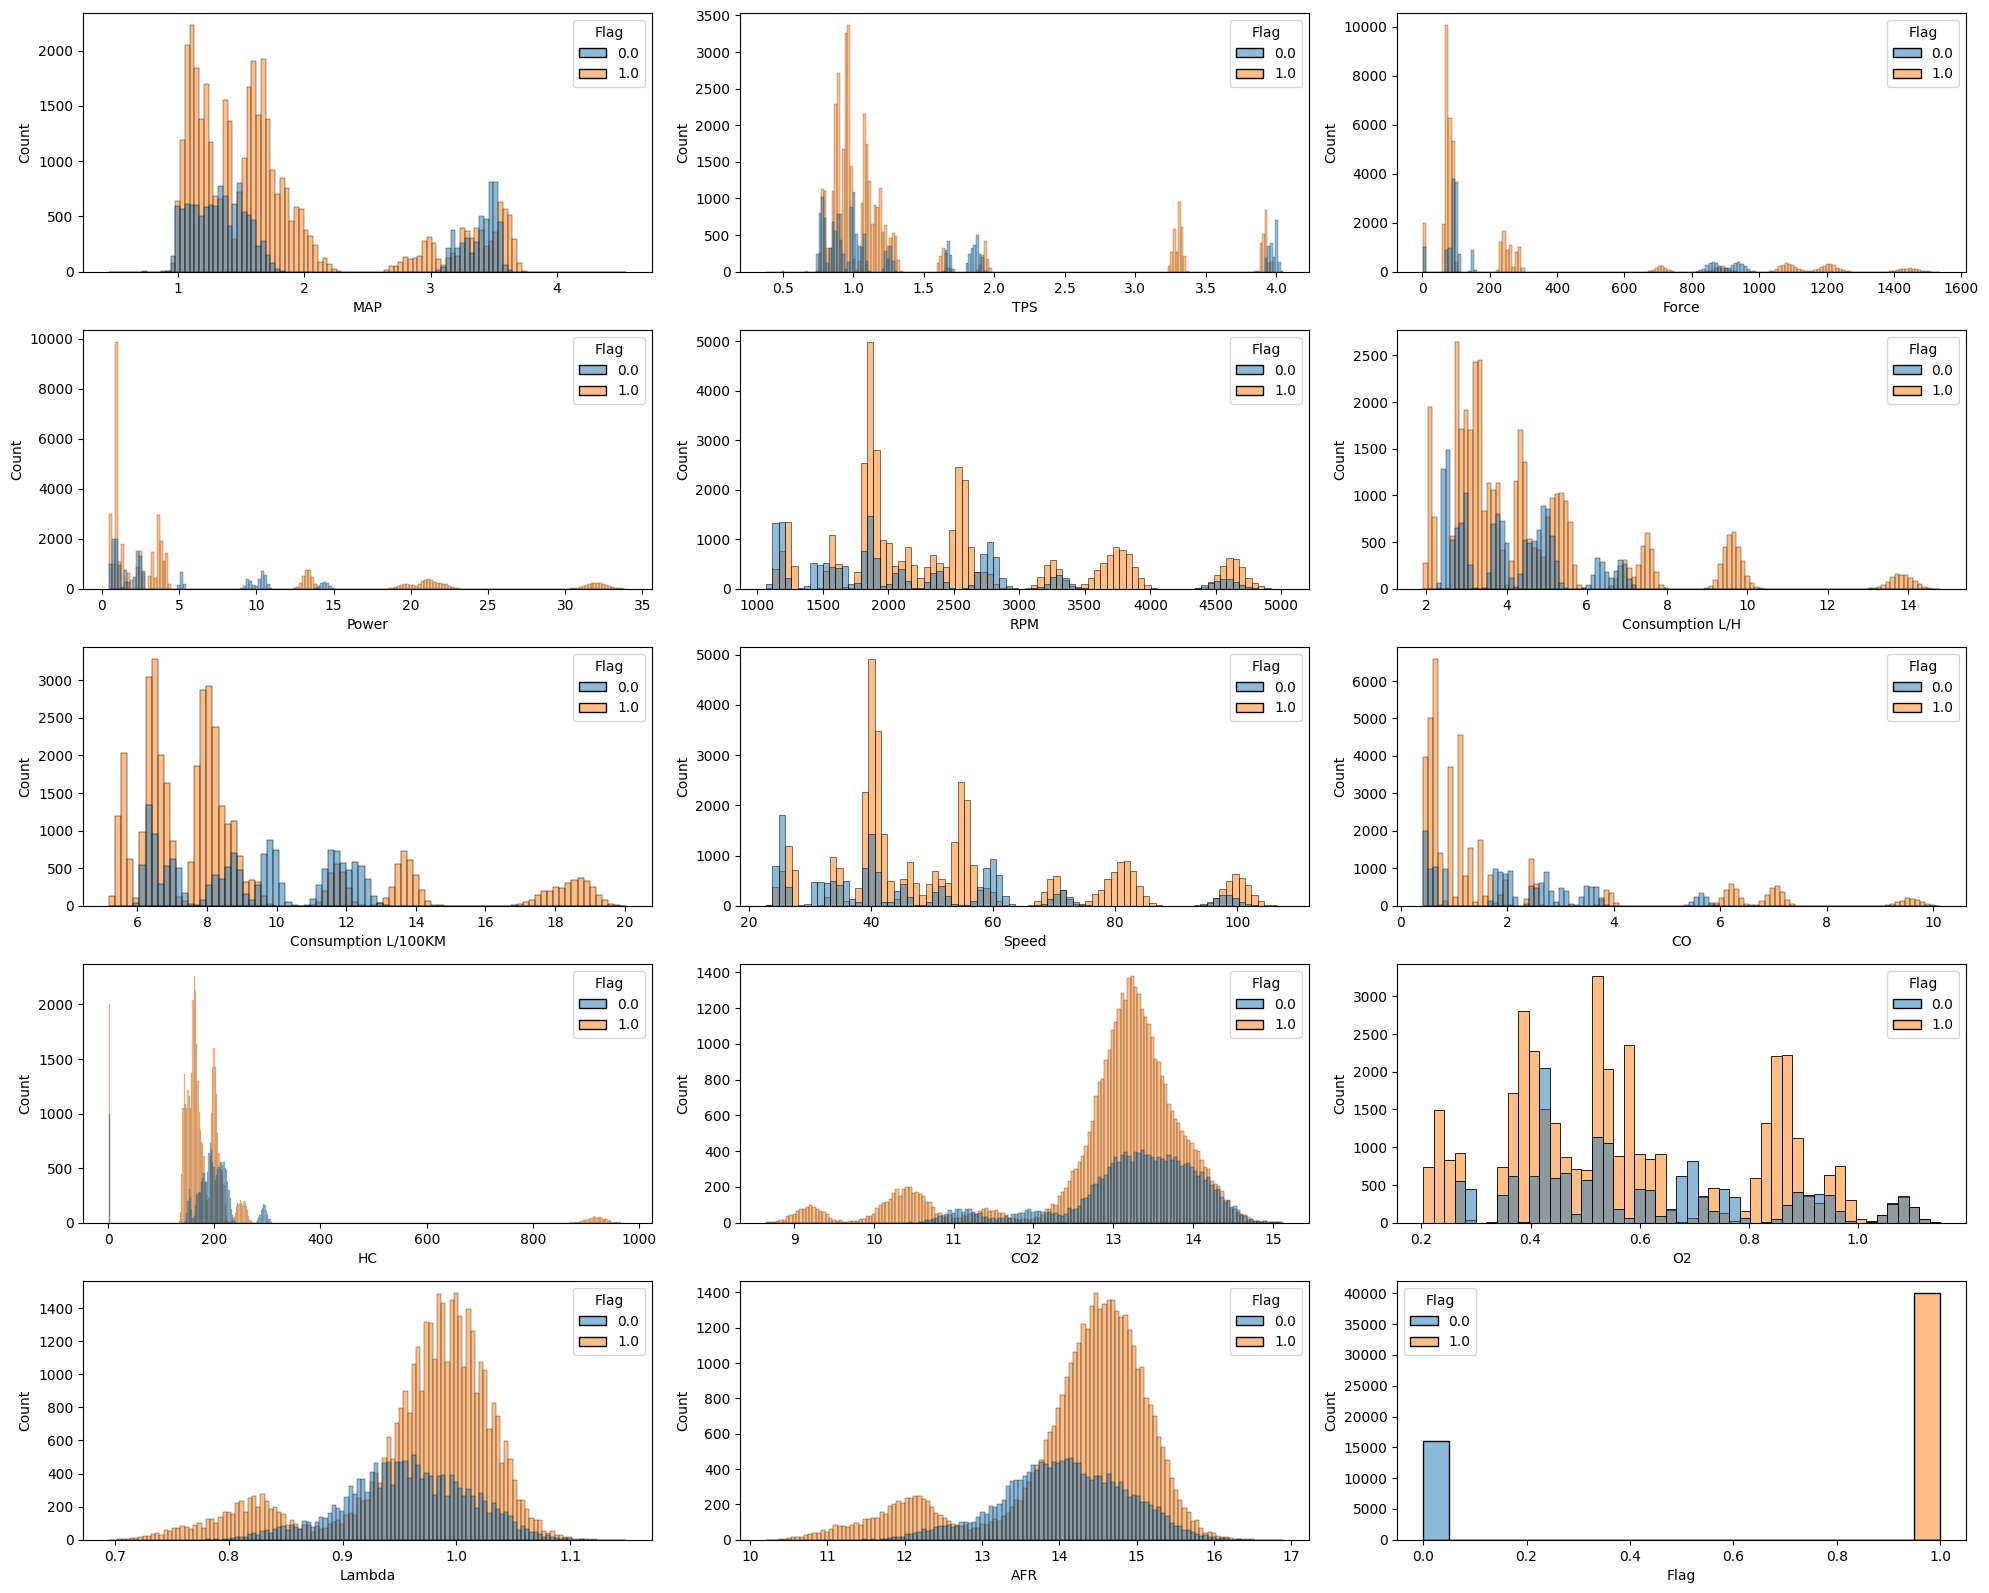

In [10]:
plt.figure(figsize=(20,16))

for i, c in enumerate(column):
    plt.subplot(5,3,i+1)
    sns.histplot(data=data2, x=c, hue='Flag')

plt.tight_layout()
plt.show()

test 데이터

Random Forest 성능 평가

정확도: 1.0000

분류 보고서:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3200
         1.0       1.00      1.00      1.00      8000

    accuracy                           1.00     11200
   macro avg       1.00      1.00      1.00     11200
weighted avg       1.00      1.00      1.00     11200



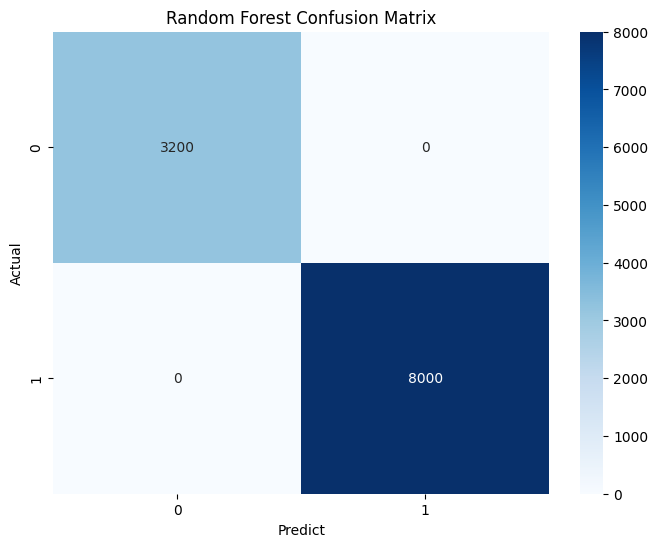

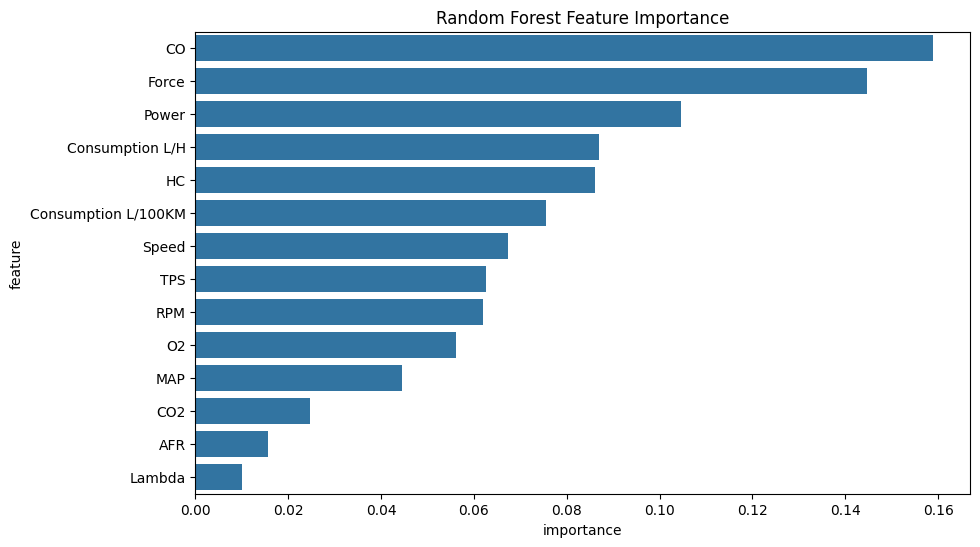

train 데이터

Random Forest 성능 평가

정확도: 1.0000

분류 보고서:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     12800
         1.0       1.00      1.00      1.00     31999

    accuracy                           1.00     44799
   macro avg       1.00      1.00      1.00     44799
weighted avg       1.00      1.00      1.00     44799



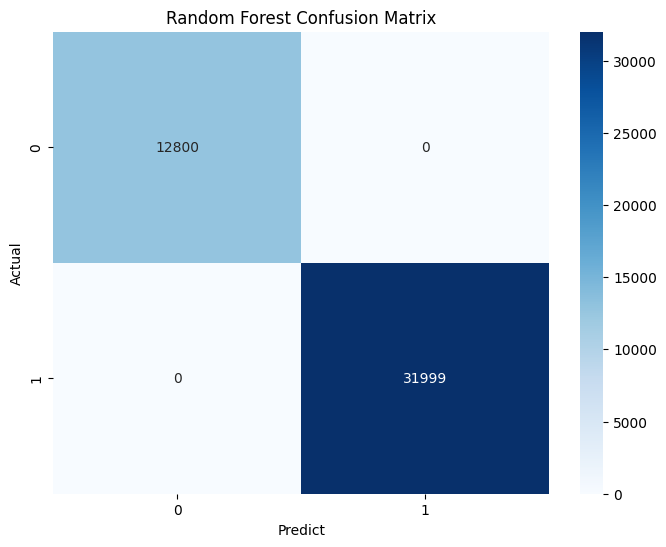

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

X = data2.drop('Flag', axis=1)
y = data2['Flag']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2, stratify=y)

rf_model = RandomForestClassifier(
    n_estimators=100,          # 트리의 개수
    max_depth=20,              # 각 트리의 최대 깊이
    min_samples_split=5,       # 노드 분할에 필요한 최소 샘플 수
    min_samples_leaf=5,        # 리프 노드의 최소 샘플 수
    random_state=42
)

rf_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)

print("test 데이터")
evaluate_model1(y_test, rf_pred, "Random Forest")

plot_feature_importance(rf_model,"Random Forest")

y_train_pred = rf_model.predict(X_train)

print("train 데이터")
evaluate_model1(y_train, y_train_pred, "Random Forest")

test 데이터

XGB 성능 평가

정확도: 0.9999

분류 보고서:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3200
         1.0       1.00      1.00      1.00      8000

    accuracy                           1.00     11200
   macro avg       1.00      1.00      1.00     11200
weighted avg       1.00      1.00      1.00     11200



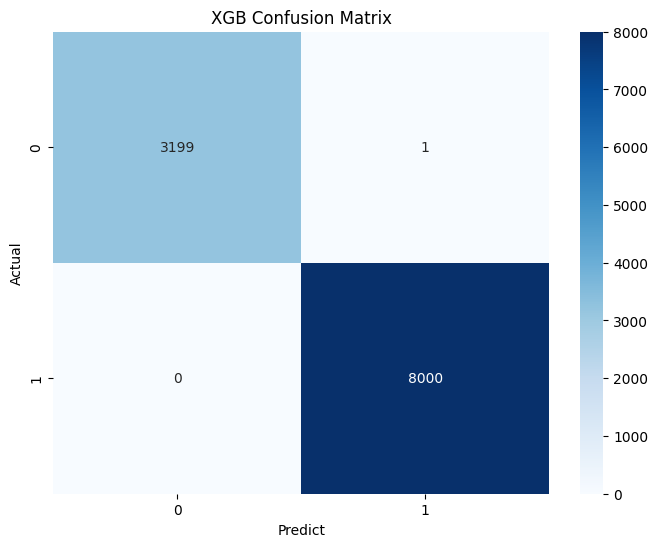

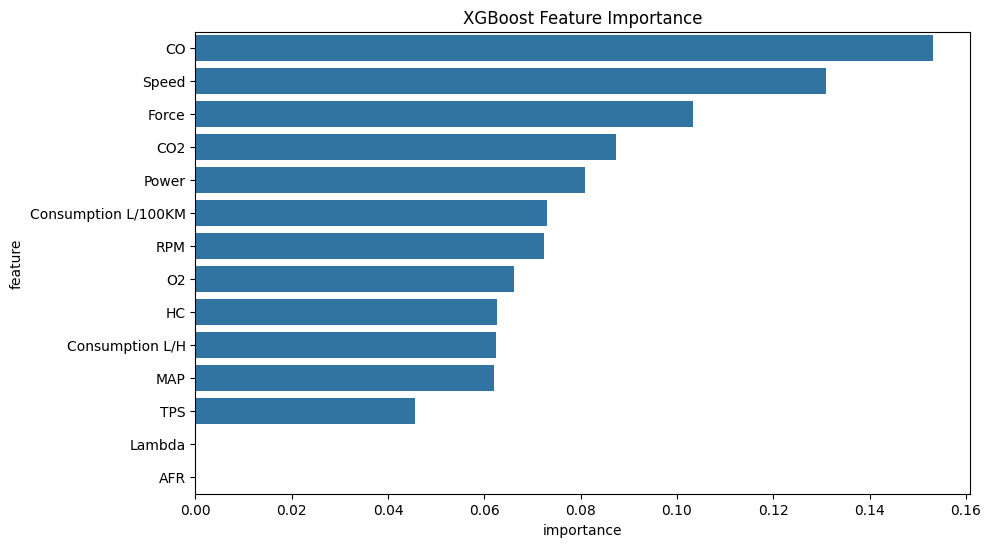

train 데이터

XGBoost 성능 평가

정확도: 0.9999

분류 보고서:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     12800
         1.0       1.00      1.00      1.00     31999

    accuracy                           1.00     44799
   macro avg       1.00      1.00      1.00     44799
weighted avg       1.00      1.00      1.00     44799



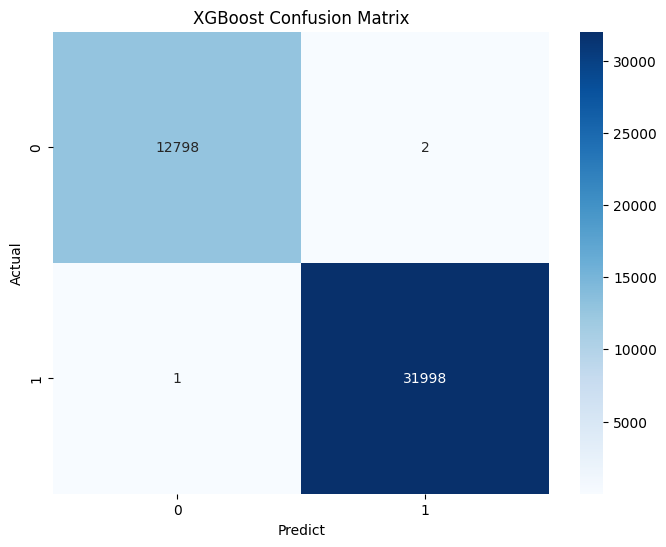

In [13]:
xgb_model = xgb.XGBClassifier(
    n_estimators=100,      # 트리의 개수
    learning_rate=0.1,     # 학습률
    max_depth=3,           # 트리의 최대 깊이
    subsample=0.8,         # 데이터 샘플링 비율
    colsample_bytree=0.8,  # 특성 샘플링 비율
    random_state=42
)

xgb_model.fit(X_train, y_train)

xgb_pred = xgb_model.predict(X_test)

print("test 데이터")
evaluate_model1(y_test, xgb_pred, 'XGB')

plot_feature_importance(xgb_model,"XGBoost")

y_train_pred = xgb_model.predict(X_train)

print("train 데이터")
evaluate_model1(y_train, y_train_pred, "XGBoost")

# 결함 유형 1, 2, 3과 정상 0과 각 변수 분포 확인

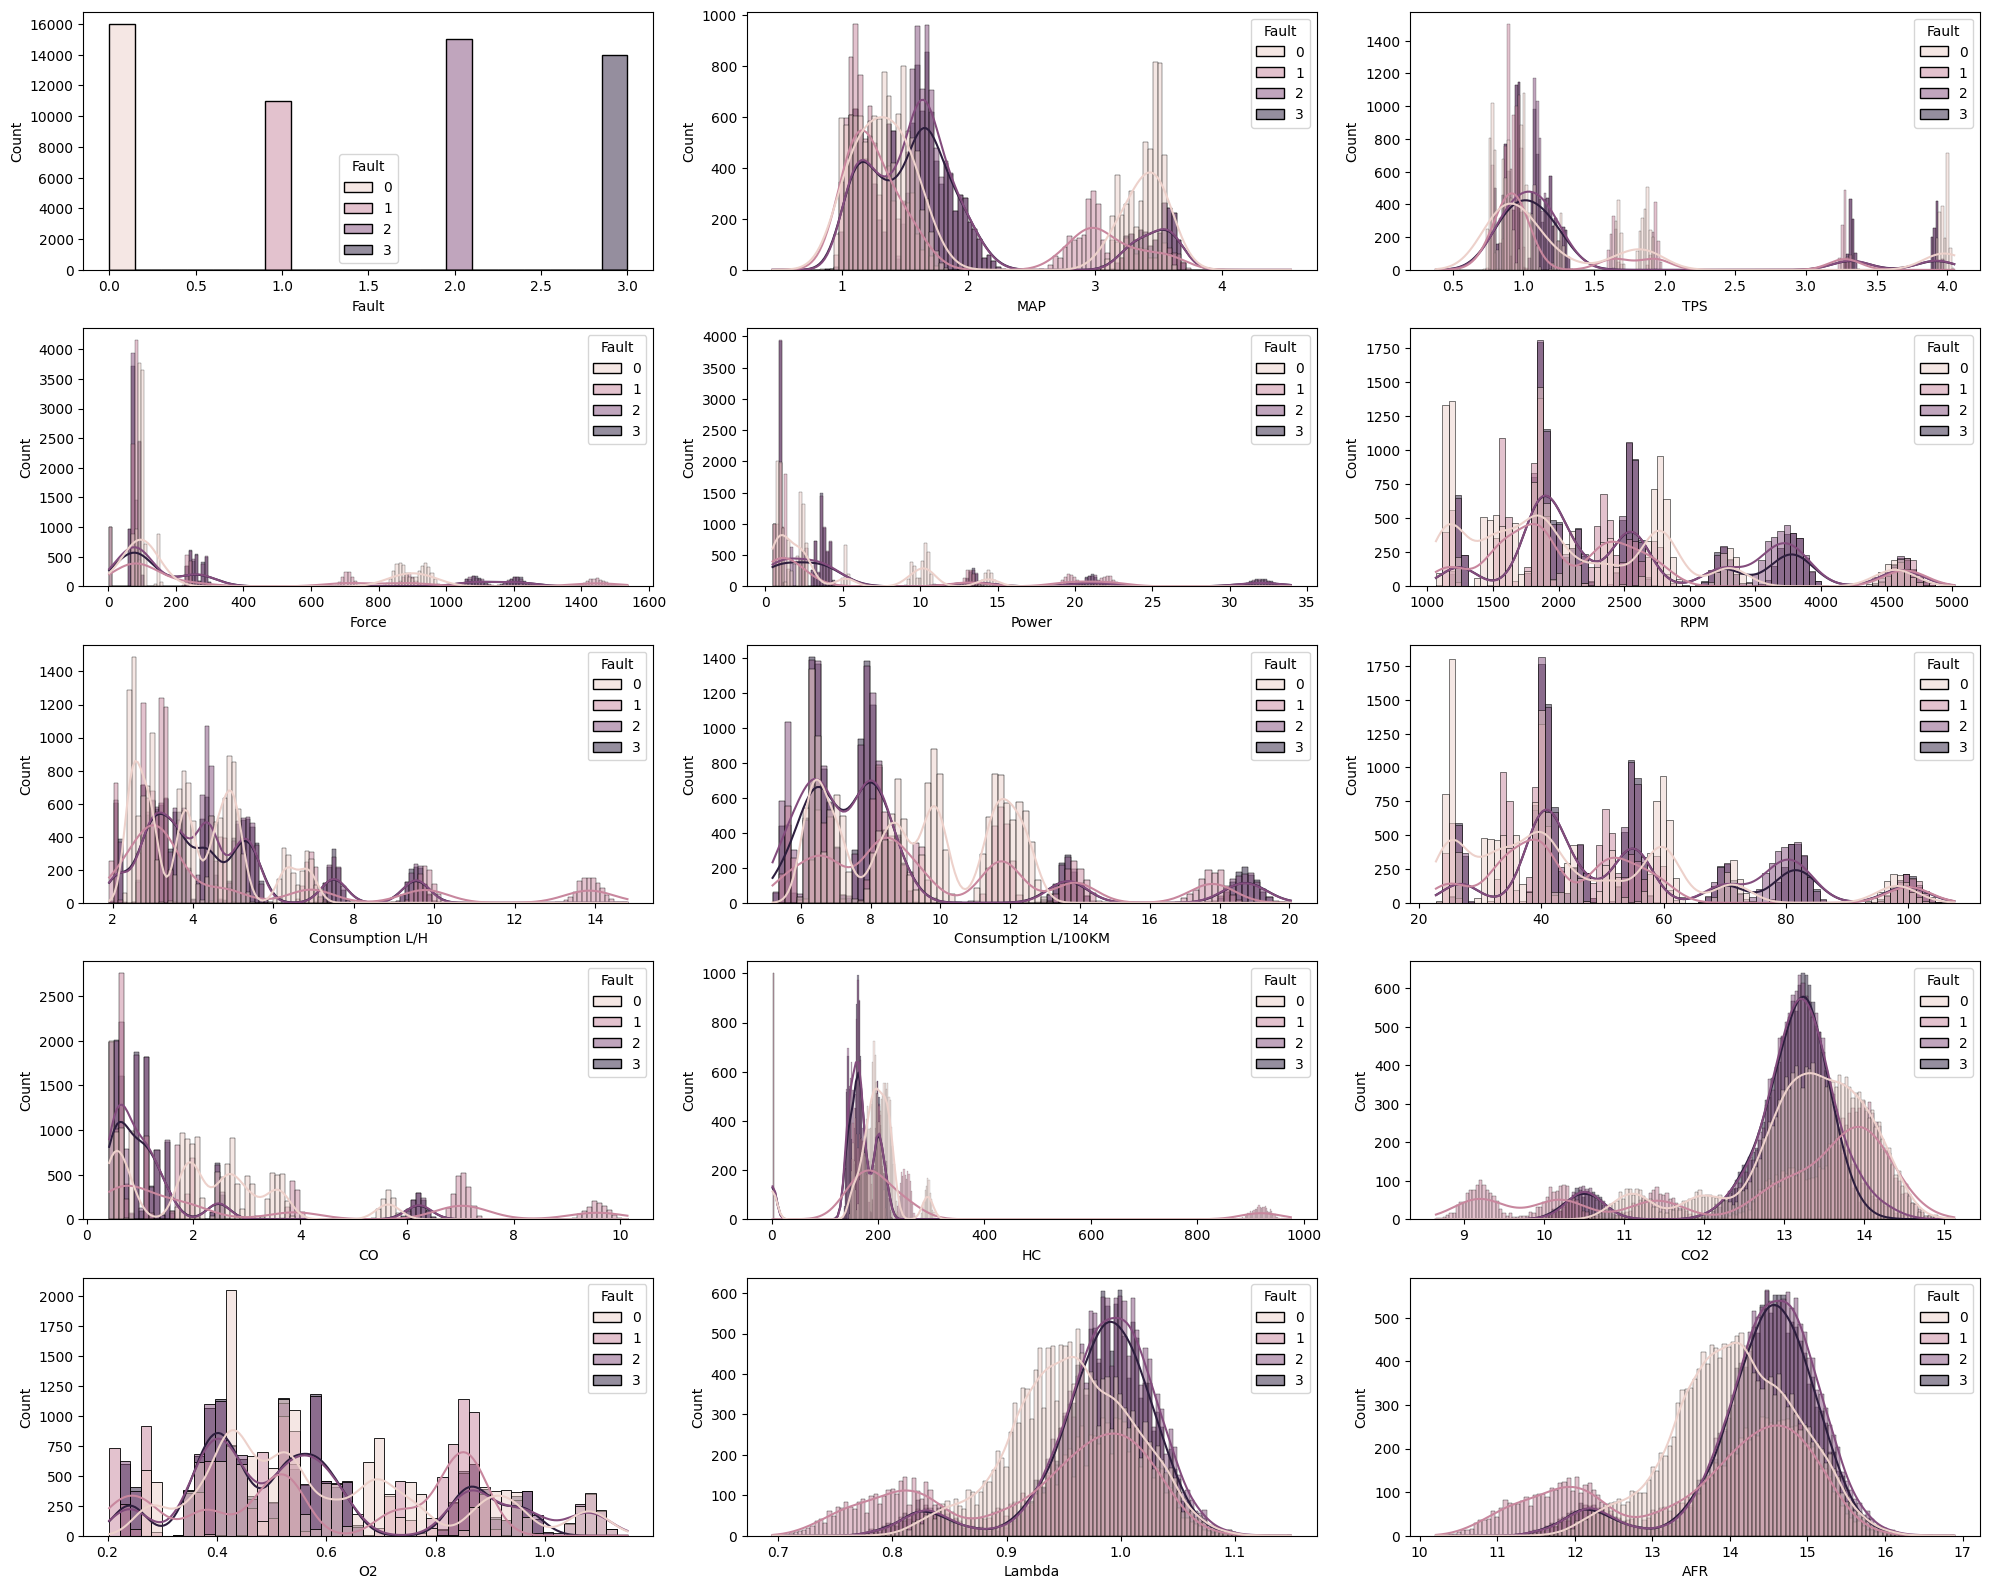

In [14]:
plt.figure(figsize=(20,16))

for i, v in enumerate(variable):
    plt.subplot(5, 3, i+1)
    sns.histplot(data=data, x=v, kde=True, hue='Fault')

plt.tight_layout()
plt.show()

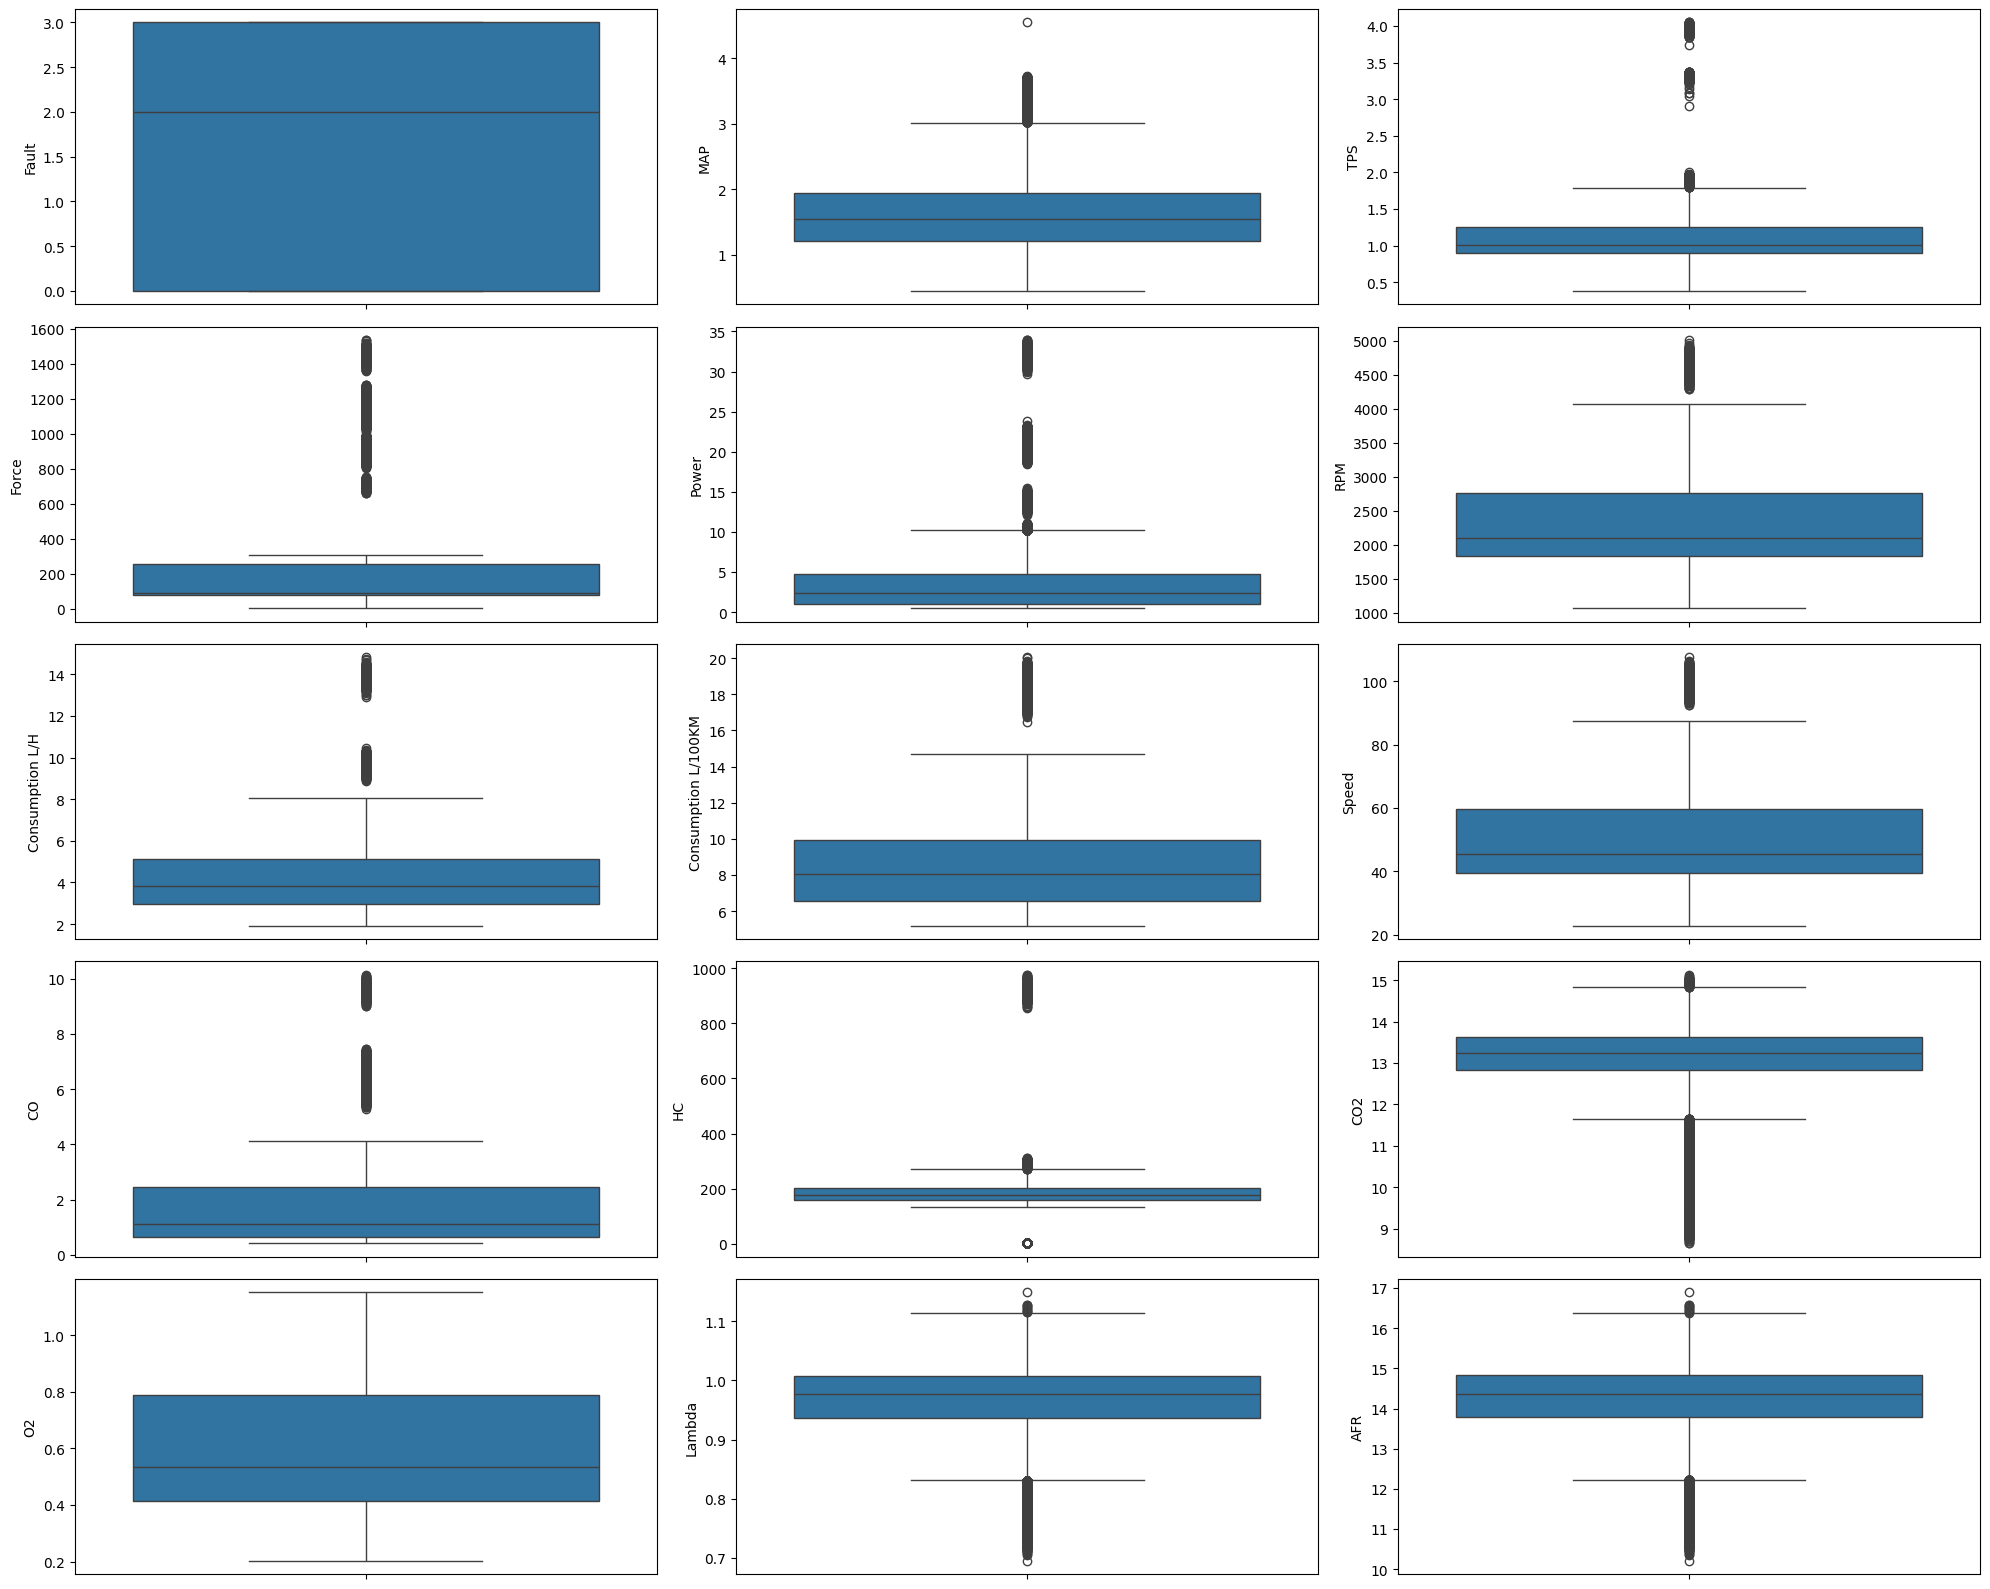

In [15]:
plt.figure(figsize=(20, 16))

for i, v in enumerate(variable):
    plt.subplot(5, 3, i+1)
    sns.boxplot(data[v])

plt.tight_layout()
plt.show()

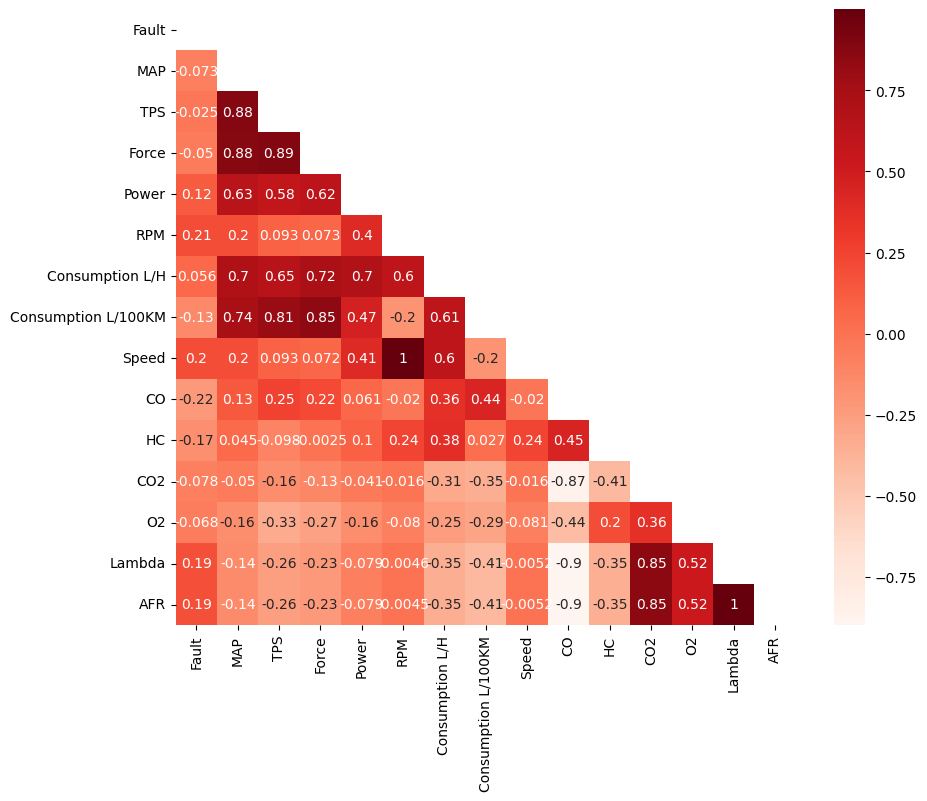

In [ ]:
corr_data = data.corr()

plt.figure(figsize=(10,8))
mask = np.zeros_like(corr_data, dtype=bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr_data, annot=True, mask=mask, cmap='Reds')
plt.show()

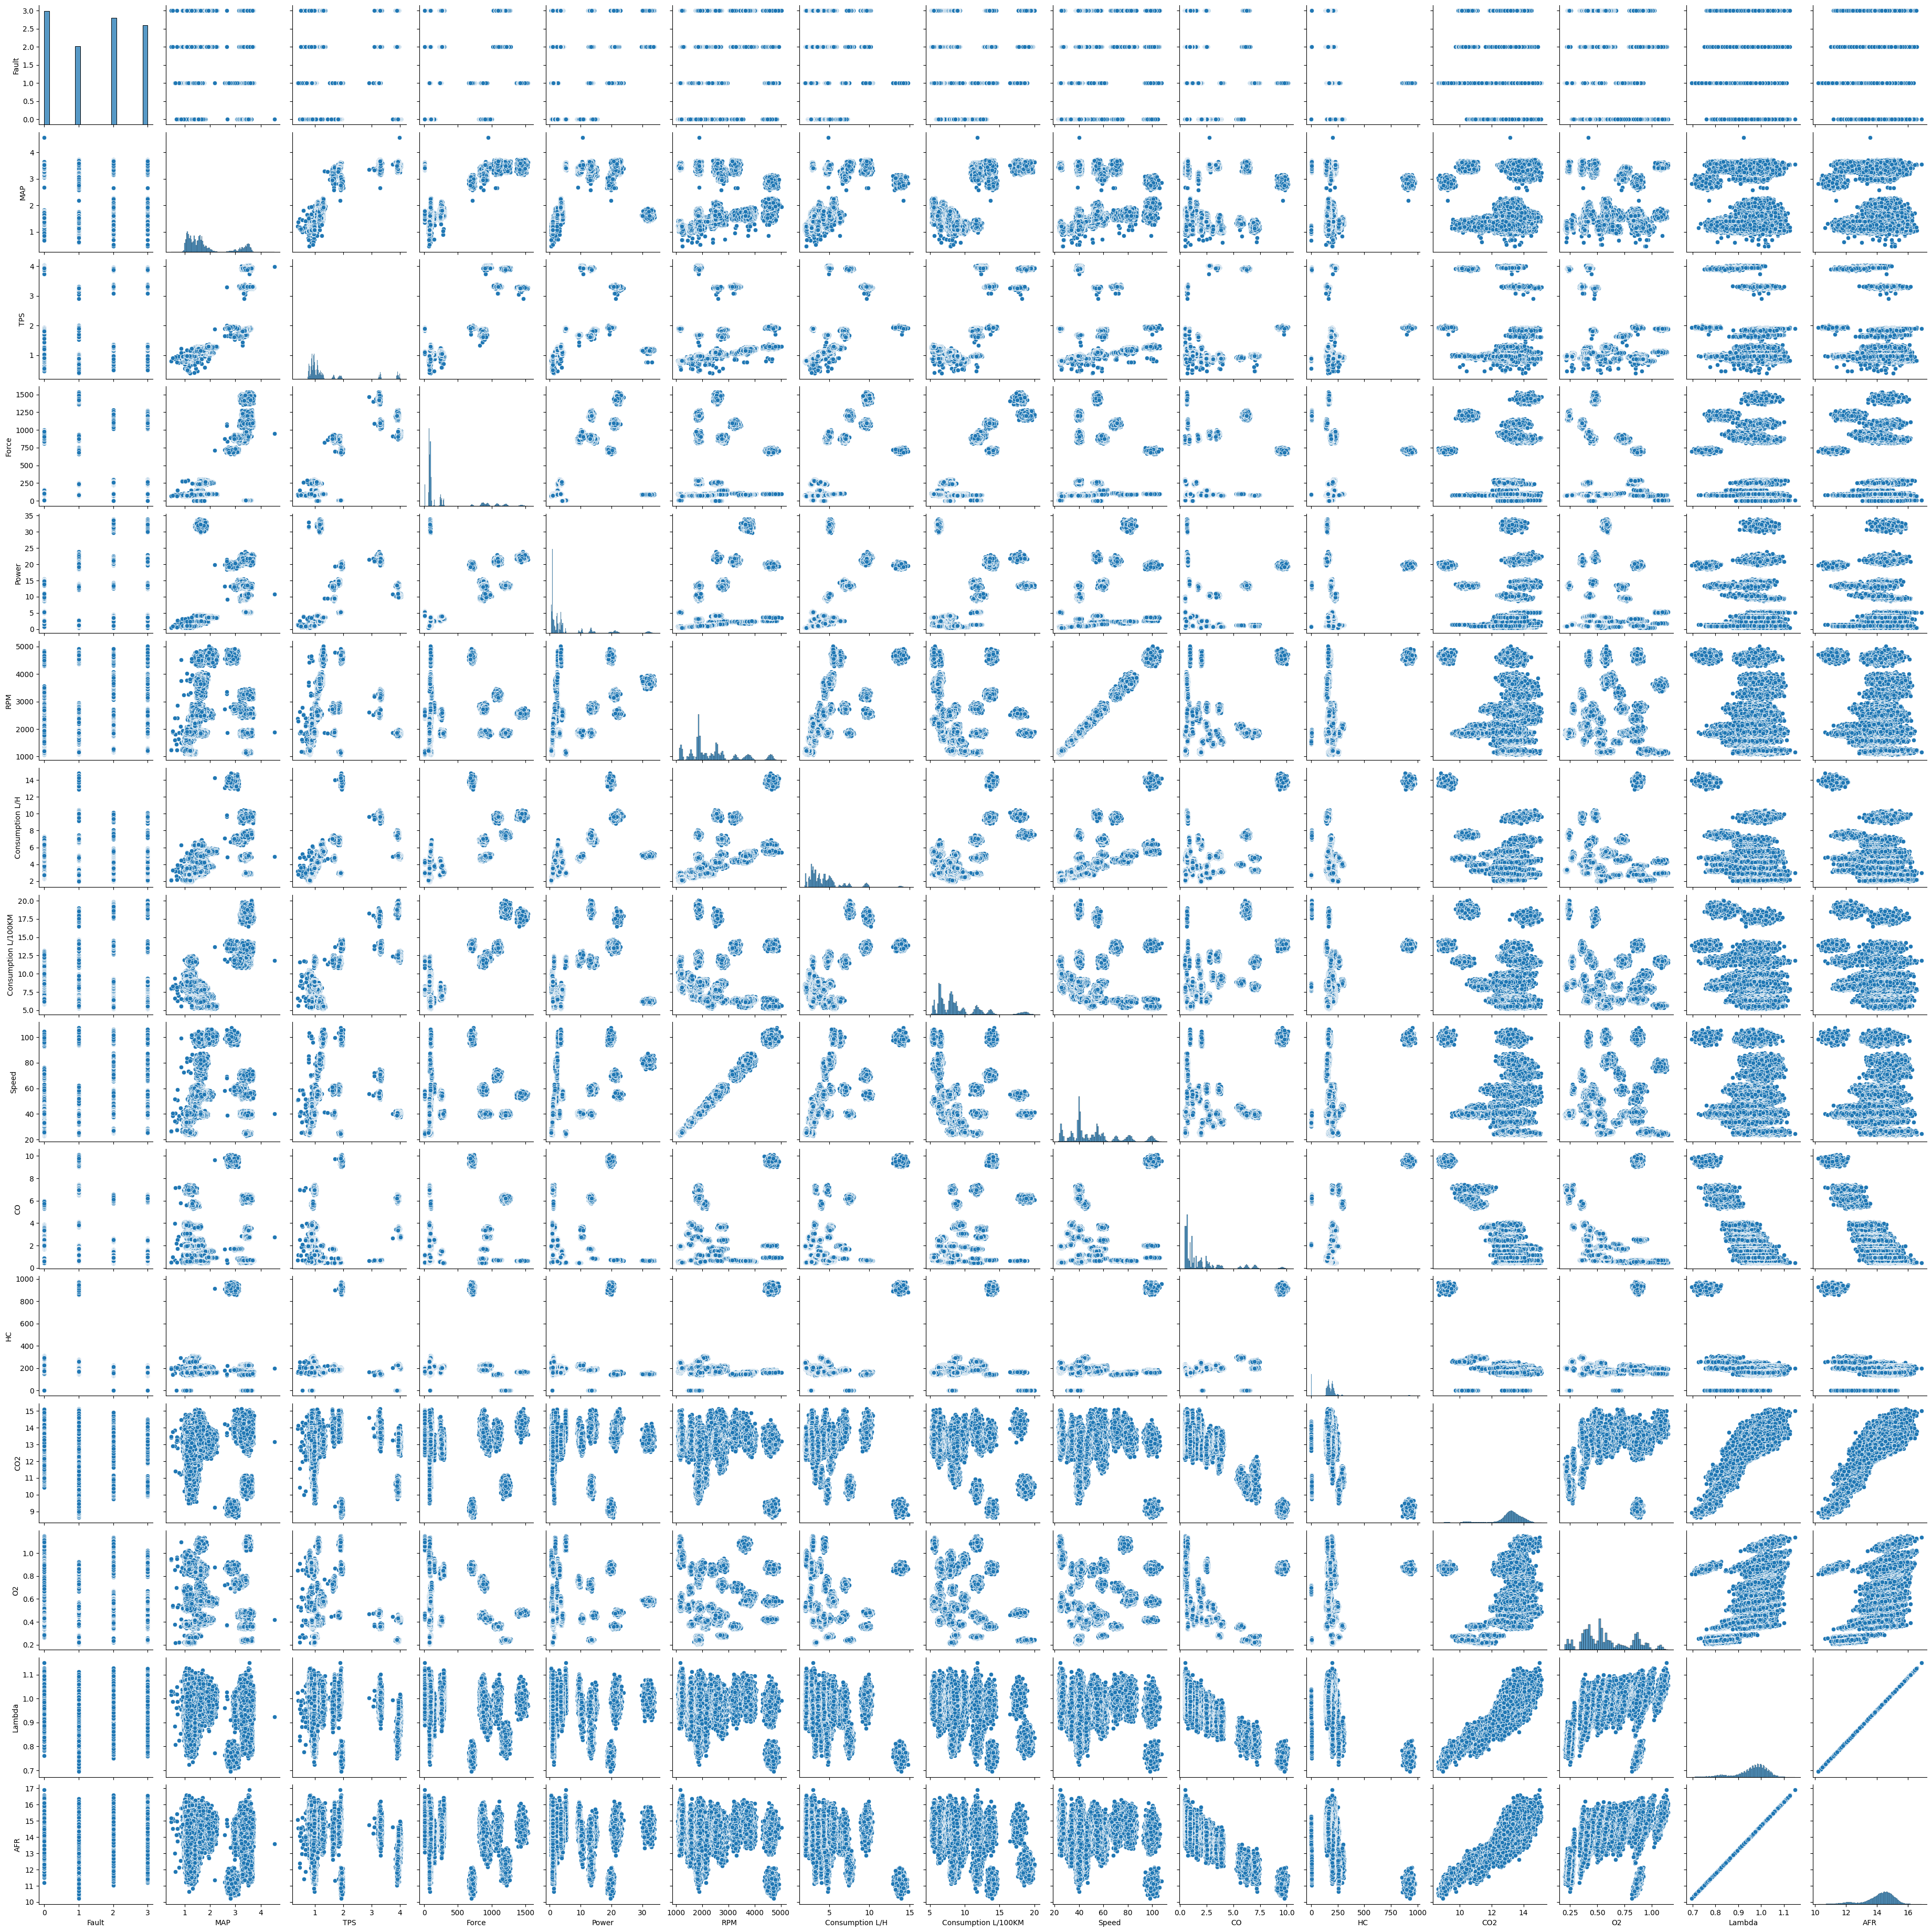

In [ ]:
sns.pairplot(data)

test 데이터

Random Forest 성능 평가

정확도: 0.7457

분류 보고서:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3200
           1       1.00      1.00      1.00      2200
           2       0.53      0.53      0.53      3000
           3       0.49      0.49      0.49      2800

    accuracy                           0.75     11200
   macro avg       0.75      0.75      0.75     11200
weighted avg       0.75      0.75      0.75     11200



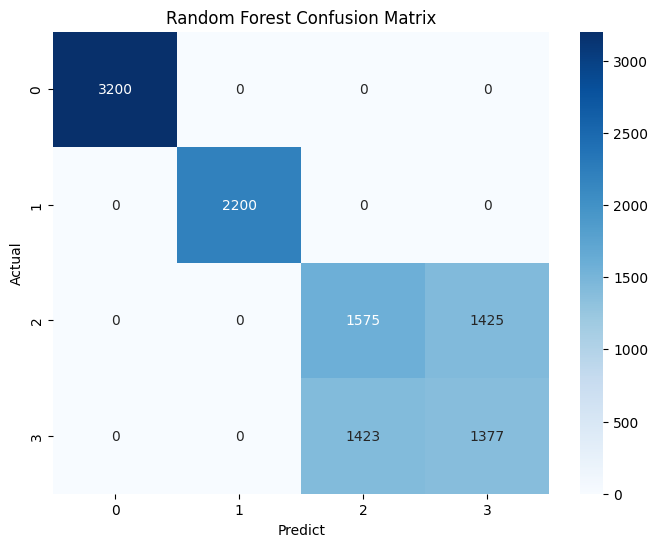

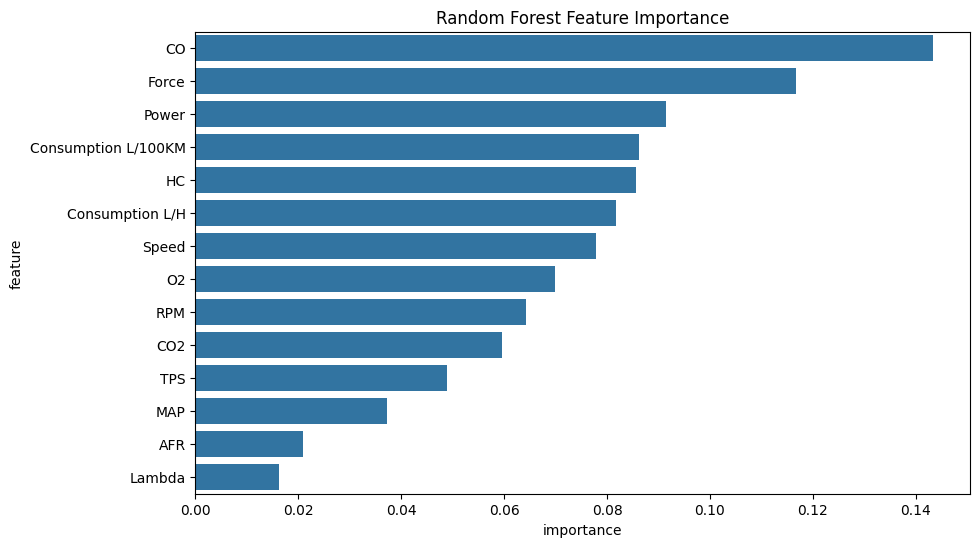

train 데이터

Random Forest 성능 평가

정확도: 0.9829

분류 보고서:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12800
           1       1.00      1.00      1.00      8798
           2       0.97      0.97      0.97     12000
           3       0.96      0.97      0.97     11201

    accuracy                           0.98     44799
   macro avg       0.98      0.98      0.98     44799
weighted avg       0.98      0.98      0.98     44799



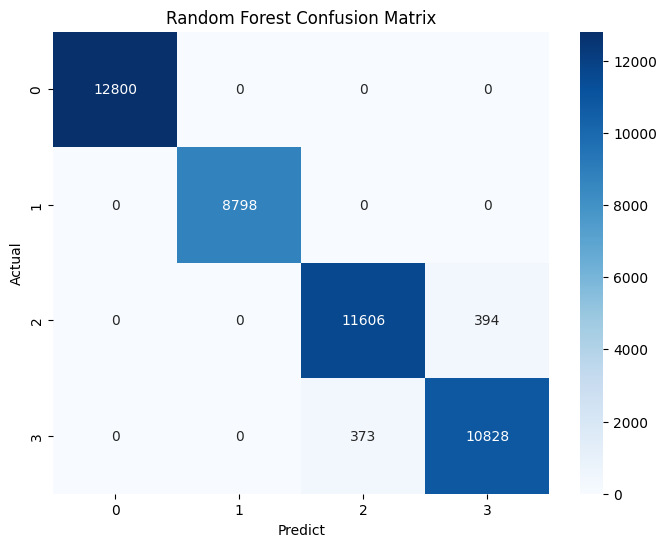

In [18]:
X = data.drop('Fault', axis=1)
y = data['Fault']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2, stratify=y)

rf_model = RandomForestClassifier(
    n_estimators=100,          # 트리의 개수
    max_depth=20,              # 각 트리의 최대 깊이
    min_samples_split=5,       # 노드 분할에 필요한 최소 샘플 수
    min_samples_leaf=5,        # 리프 노드의 최소 샘플 수
    random_state=42
)

rf_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)

print("test 데이터")
evaluate_model(y_test, rf_pred, "Random Forest")

plot_feature_importance(rf_model,"Random Forest")

y_train_pred = rf_model.predict(X_train)

print("train 데이터")
evaluate_model(y_train, y_train_pred, "Random Forest")

test 데이터

XGB 성능 평가

정확도: 0.7472

분류 보고서:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3200
           1       1.00      1.00      1.00      2200
           2       0.53      0.56      0.54      3000
           3       0.50      0.47      0.48      2800

    accuracy                           0.75     11200
   macro avg       0.76      0.76      0.75     11200
weighted avg       0.75      0.75      0.75     11200



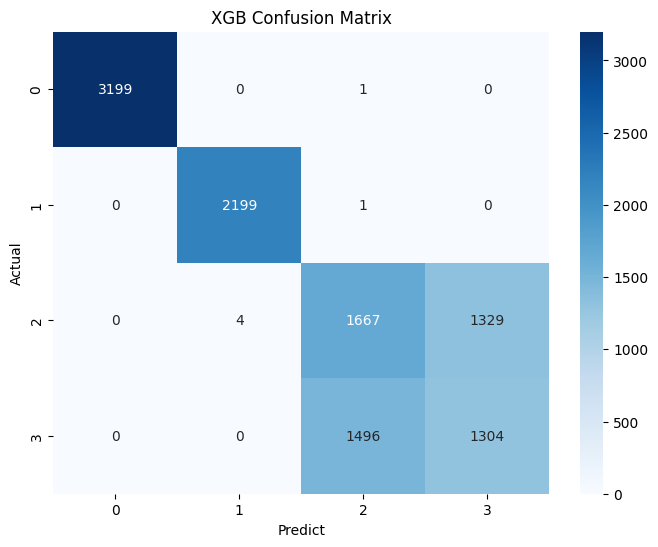

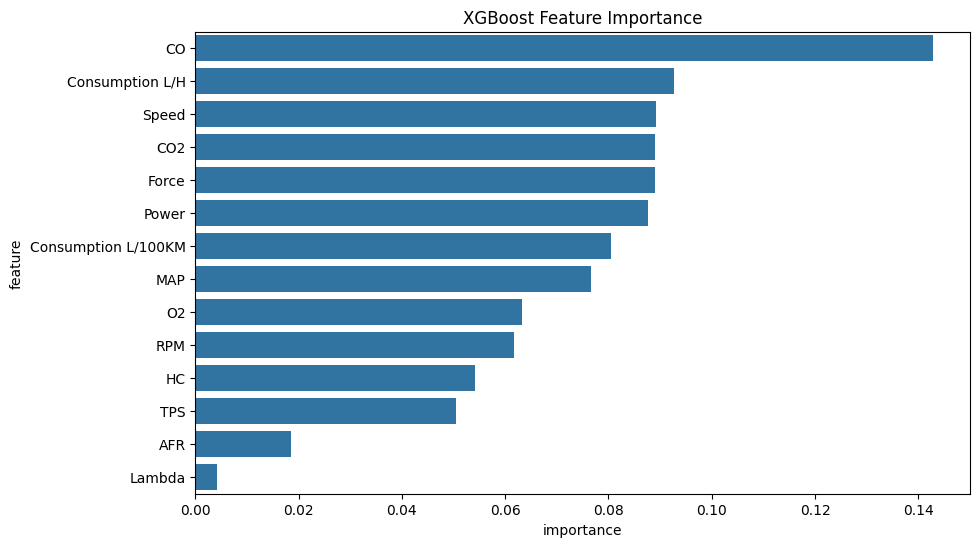

train 데이터

XGBoost 성능 평가

정확도: 0.7695

분류 보고서:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12800
           1       1.00      1.00      1.00      8798
           2       0.57      0.60      0.58     12000
           3       0.54      0.50      0.52     11201

    accuracy                           0.77     44799
   macro avg       0.78      0.78      0.78     44799
weighted avg       0.77      0.77      0.77     44799



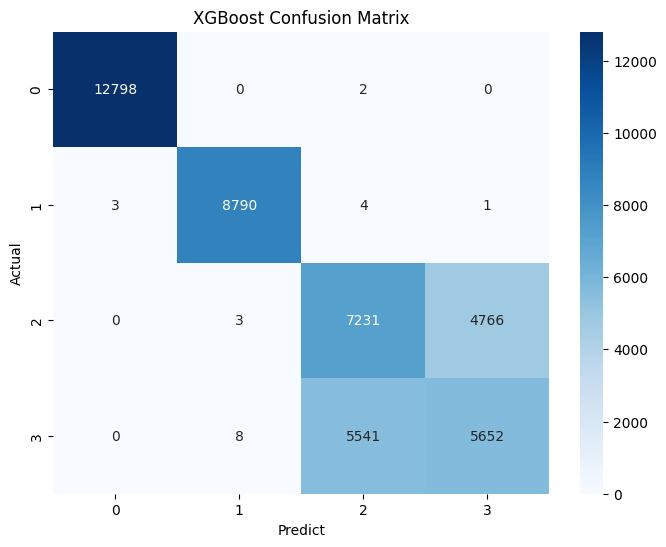

In [19]:
xgb_model = xgb.XGBClassifier(
    n_estimators=100,      # 트리의 개수
    learning_rate=0.1,     # 학습률
    max_depth=3,           # 트리의 최대 깊이
    subsample=0.8,         # 데이터 샘플링 비율
    colsample_bytree=0.8,  # 특성 샘플링 비율
    random_state=42
)

xgb_model.fit(X_train, y_train)

xgb_pred = xgb_model.predict(X_test)

print("test 데이터")
evaluate_model(y_test, xgb_pred, 'XGB')

plot_feature_importance(xgb_model,"XGBoost")

y_train_pred = xgb_model.predict(X_train)

print("train 데이터")
evaluate_model(y_train, y_train_pred, "XGBoost")

# 불량 2유형과 3유형 비교

In [32]:
data_fault_2 = data[data['Fault'] == 2]
data_fault_3 = data[data['Fault'] == 3]
print(len(data_fault_2))
print(len(data_fault_3))

data_fault_2_and_3 = pd.concat([data_fault_2, data_fault_3]).reset_index()
len(data_fault_2_and_3)

15000
14001


29001

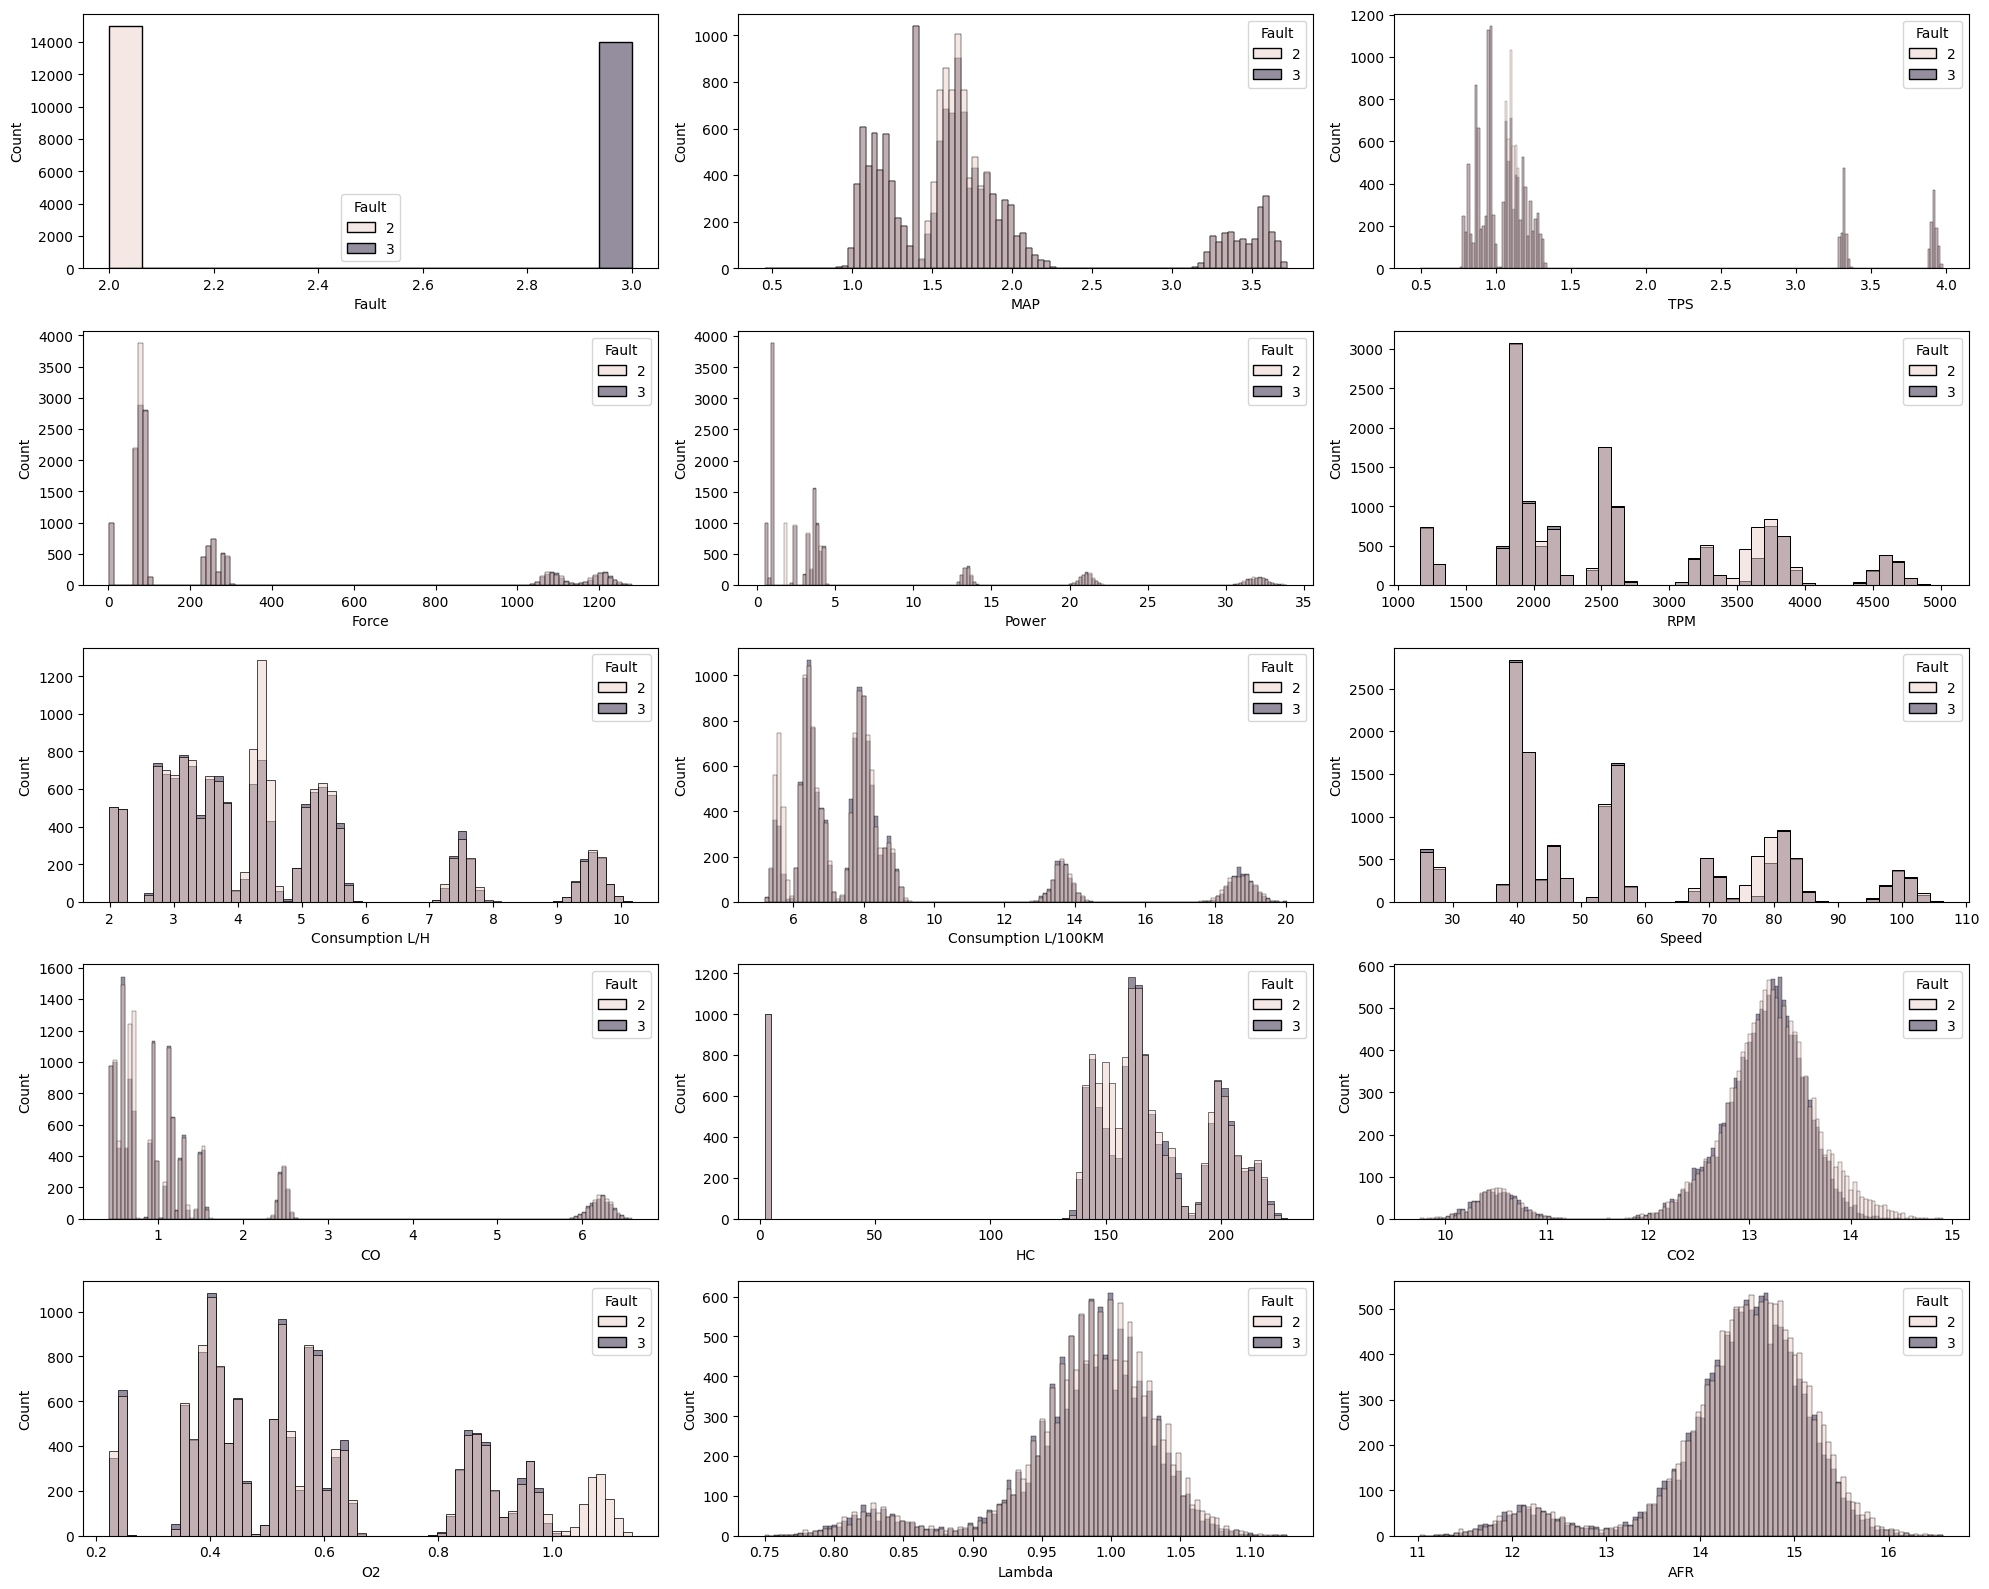

In [33]:
plt.figure(figsize=(20, 16))

for i, v in enumerate(variable):
    plt.subplot(5, 3, i+1)
    sns.histplot(data=data_fault_2_and_3, x=v, hue='Fault')

plt.tight_layout()
plt.show()

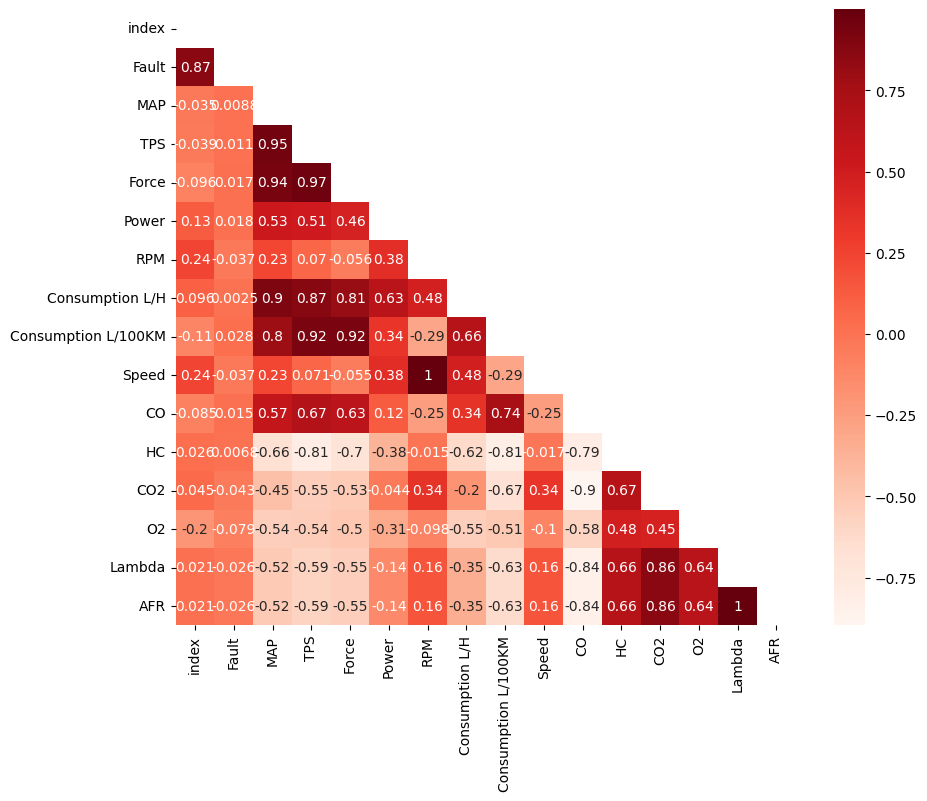

In [34]:
corr_drop_data = data_fault_2_and_3.corr()

plt.figure(figsize=(10,8))
mask = np.zeros_like(corr_drop_data, dtype=bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr_drop_data, annot=True, mask=mask, cmap='Reds')
plt.show()